In [2]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [5]:
# Path to dataset: structured as "dataset/A/A1.jpg", "dataset/B/B2.jpg", etc.
DATASET_PATH = "C:/Users/johnsoml/Python/asl_dataset"  #Replace with your dataset path
IMAGE_SIZE = (100, 100)

def load_images_and_labels(dataset_path):
    X = []
    y = []
    for label in sorted(os.listdir(dataset_path)):
        label_path = os.path.join(dataset_path, label)
        if not os.path.isdir(label_path):
            continue
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, IMAGE_SIZE)
            edges = cv2.Canny(img, 100, 200)
            X.append(edges.flatten())
            y.append(label)
    return np.array(X), np.array(y)

# Load data
print("Loading images...")
X, y = load_images_and_labels(DATASET_PATH)

Loading images...


In [6]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN classifier
print("Training classifier...")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate
print("Evaluating...")
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

Training classifier...
Evaluating...
              precision    recall  f1-score   support

           a       0.78      0.64      0.70        11
           b       0.60      1.00      0.75        12
           c       0.73      0.80      0.76        10
           d       0.77      1.00      0.87        17
           e       1.00      0.53      0.70        15
           f       0.94      0.84      0.89        19
           g       0.93      0.72      0.81        18
           h       1.00      0.84      0.91        19
           i       1.00      0.50      0.67        16
           j       1.00      0.43      0.60         7
           k       0.60      0.67      0.63         9
           l       0.92      0.61      0.73        18
           m       1.00      0.64      0.78        14
           n       1.00      0.43      0.60        14
           o       0.38      1.00      0.55        11
           p       0.23      1.00      0.37        14
           q       1.00      0.79      0.88 

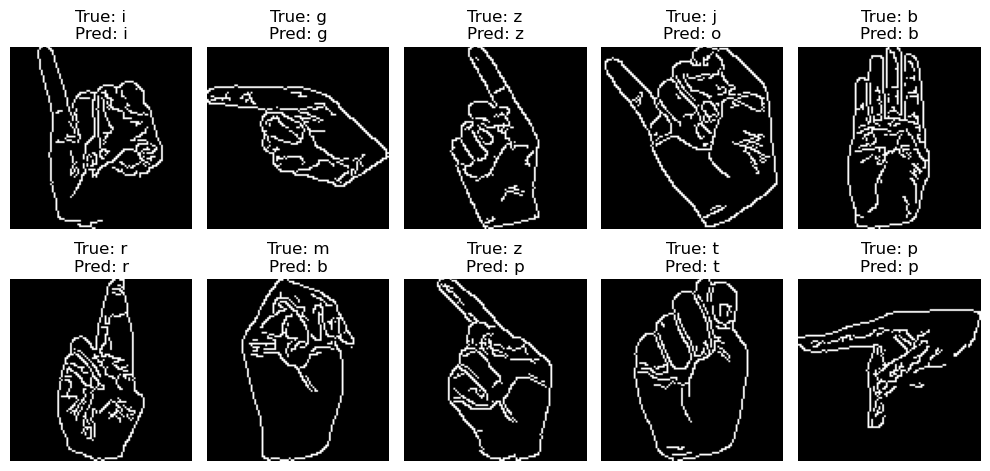

In [7]:
# Show some examples
def show_examples(images, labels, preds=None):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        edge_img = images[i].reshape(IMAGE_SIZE)
        plt.imshow(edge_img, cmap='gray')
        title = f"True: {labels[i]}"
        if preds is not None:
            title += f"\nPred: {preds[i]}"
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_examples(X_test, y_test, y_pred)